# Exploratory analysis of LBMP data
This notebook includes a handfull of figures looking at basic characteristics and trends of the NYC LBMP data in 2017. It is not intended to be a complete analysis, just a quick overview to better understand the price data.

In [2]:
import pandas as pd
import altair as alt
from pathlib import Path
from src.read_data import read_all_nyc


alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

## Import data and add temporal columns

In [3]:
data_path = Path.cwd() / '2017_NYISO_LBMPs'
df = read_all_nyc(data_path)

In [7]:
# Drop the first hour, which is part of 2016 week 52
df = df.loc[df.time_stamp >= '2017-01-02', :]

In [41]:
df['week'] = df.time_stamp.dt.week
df['month'] = df.time_stamp.dt.month
df['quarter'] = df.time_stamp.dt.quarter
df['hour_of_day'] = df.time_stamp.dt.hour
df['day_of_week'] = df.time_stamp.dt.dayofweek

In [42]:
df.head()

time_stamp    name   lbmp  hour  week  hour_of_day  day_of_week  \
24 2017-01-02 00:00:00  N.Y.C.  36.16    24     1            0            0   
25 2017-01-02 01:00:00  N.Y.C.  35.07    25     1            1            0   
26 2017-01-02 02:00:00  N.Y.C.  30.14    26     1            2            0   
27 2017-01-02 03:00:00  N.Y.C.  27.35    27     1            3            0   
28 2017-01-02 04:00:00  N.Y.C.  29.90    28     1            4            0   

    month  quarter  
24      1        1  
25      1        1  
26      1        1  
27      1        1  
28      1        1

## Data exploration

Lets start by looking at the distribution of NYC LBMP values in 2017. From the figure below it appears that most values are between \\$20 and \\$40 dollars, very few values are below \\$10, and prices occasionally go above \\$100.

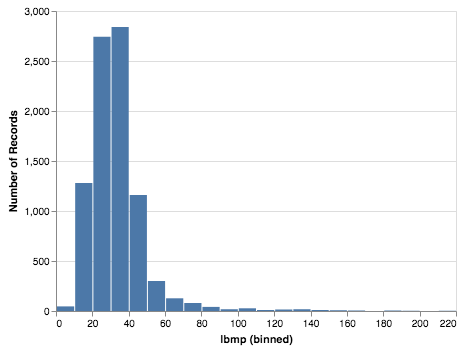

In [32]:
alt.Chart(df).mark_bar().encode(
    alt.X('lbmp:Q', bin=alt.Bin(step=10)),
    y='count()'
)

Since hourly prices are skewed and have a long(ish) tail, lets use a heatmap to look at the median hourly LBMP for every week of the year. This will help determine if high prices tend to show up during certain times of the day or year.

There may be some within-day trends, but they don't seem to hold for the all weeks of the year. Median prices are often lowest in early morning hours. Some periods of the year see an early afternoon dip in prices, but afternoon hours have the highest prices in other weeks. Futher investigation would be needed to identify potential causal factors.

Week 11 has higher than normal prices, but week 52 is the real outlier. Median prices in that week are always above \\$85.

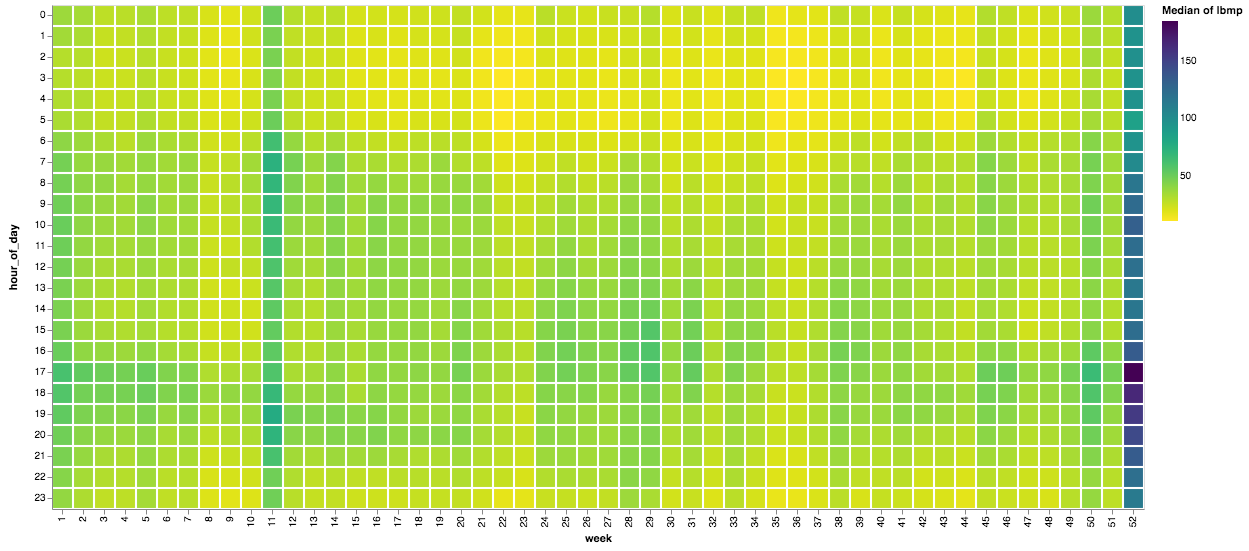

In [39]:
alt.Chart(df).mark_rect().encode(
    x='week:O',
    y='hour_of_day:O',
    color=alt.Color('median(lbmp):Q', sort='descending'),
    tooltip='median(lbmp):Q'
)

Grouping the same data by quarter and day of week rather than week of year helps to show some basic differences across the year and on weekdays vs weekends.

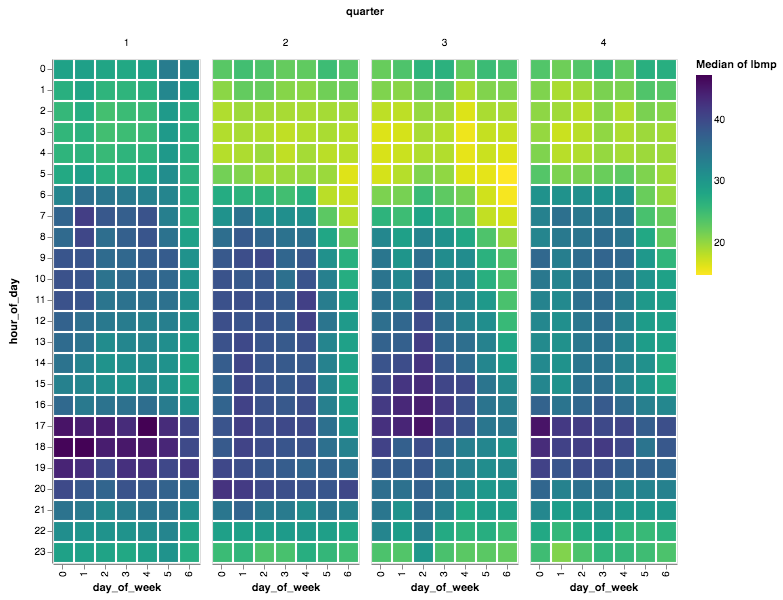

In [43]:
alt.Chart(df).mark_rect().encode(
    x='day_of_week:O',
    y='hour_of_day:O',
    column='quarter:O',
    color=alt.Color('median(lbmp):Q', sort='descending')
)